In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("toxicloser/ibug-300w-large-face-landmark-dataset")

print("Path to dataset files:", path)

Resuming download from 543162368 bytes (1257171364 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/toxicloser/ibug-300w-large-face-landmark-dataset?dataset_version_number=1 (543162368/1800333732) bytes left.


 34%|███▎      | 579M/1.68G [00:10<03:21, 5.93MB/s]


KeyboardInterrupt: 

In [3]:
print("Path to dataset files:", path)

NameError: name 'path' is not defined

In [3]:
import torch
from torch.utils.data import Dataset
from xml.etree import ElementTree as ET
import os
from PIL import Image
import matplotlib.pyplot as plt
from typing import Dict
import numpy as np

In [4]:
datadir = '../data/ibug_300W_large_face_landmark_dataset'
xml_path = os.path.join(datadir,'labels_ibug_300W_train.xml')
root = ET.parse(xml_path).getroot()

root

<Element 'dataset' at 0x000002552F06DBD0>

In [5]:
samples = root.find('images')

samples

<Element 'images' at 0x000002552F132360>

In [15]:
def get_cropped_labeled_sample(sample: ET.Element) -> Dict:
    filename = sample.attrib['file']
    width = int(sample.attrib['width'])
    height = int(sample.attrib['height'])
    
    box = sample.find('box')
    box_top = int(box.attrib['top'])
    box_left = int(box.attrib['left'])
    box_width = int(box.attrib['width'])
    box_height = int(box.attrib['height'])
    
    landmarks = np.array([
        [float(part.attrib['x']), float(part.attrib['y'])] for part in box
    ])
    # landmarks -= np.array([box_left, box_top]) # crop
    # landmarks /= np.array([box_width, box_height])
    # landmarks -= 0.5
        
    return dict(
        filename=filename, width=width, height=height,
        box_top=box_top, box_left=box_left, box_width=box_width, box_height=box_height, 
        landmarks=landmarks,
        # original_image=original_image, cropped_image=cropped_image,
    )

def show_sample(datadir, sample: Dict):
    filename = sample['filename']
    width: int = sample['width']
    height: int = sample['height']
    box_top: int = sample['box_top']
    print(box_top)
    box_left: int = sample['box_left']
    print(box_left)
    box_width: int = sample['box_width']
    print(box_width)
    box_height: int = sample['box_height']
    print(box_height)  
    landmarks: np.ndarray = sample['landmarks'] - np.array([box_left, box_top])
    original_image: Image = Image.open( os.path.join(datadir, filename) )
    cropped_image: Image = original_image.crop((box_left, box_top, box_left+box_width, box_top+box_height))
    
    plt.imshow(cropped_image)
    plt.scatter(landmarks[:,0], landmarks[:,1], s=5, c='c')
    print(landmarks.shape)




396
496
771
771
(68, 2)


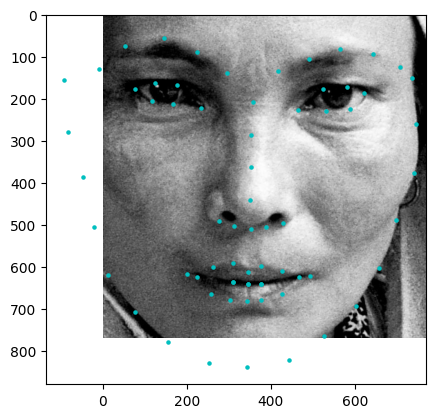

In [59]:
for i, sample in enumerate(samples):
    sample = get_cropped_labeled_sample(sample)
    # print(sample) #, landmarks)
    if i == 4397: break
    
show_sample(datadir, sample)

In [8]:
from typing import Any, Dict, Optional

import torch
import torchvision
from pytorch_lightning import LightningDataModule
from torch.utils.data import DataLoader, Dataset, random_split
import albumentations as A
from albumentations import Compose
from albumentations.pytorch.transforms import ToTensorV2

import os
from xml.etree import ElementTree as ET
import numpy as np
from PIL import Image, ImageDraw

In [9]:
path = pyrootutils.find_root(
    search_from="E:/UET/vscode/Filter/facial_landmarks-wandb", indicator=".project-root")
config_path = str(path / "configs" / "data")
output_path = path / "outputs"
print("root", path, config_path)

NameError: name 'pyrootutils' is not defined

In [ ]:
def _get_cropped_labeled_sample(sample: ET.Element) -> Dict:
    filename = sample.attrib['file']
    width = int(sample.attrib['width'])
    height = int(sample.attrib['height'])

    box = sample.find('box')
    box_top = int(box.attrib['top'])
    box_left = int(box.attrib['left'])
    box_width = int(box.attrib['width'])
    box_height = int(box.attrib['height'])

    landmarks = np.array([
        [float(part.attrib['x']), float(part.attrib['y'])] for part in box
    ])
    landmarks -= np.array([box_left, box_top])  # crop

    return dict(
        filename=filename, width=width, height=height,
        box_top=box_top, box_left=box_left, box_width=box_width, box_height=box_height,
        landmarks=landmarks,
        # original_image=original_image, cropped_image=cropped_image,
    )

In [ ]:

def _load_data(data_dir: str, xml_file: str):
    """Load data from xml file."""
    xml_path = os.path.join(data_dir, xml_file)
    root = ET.parse(xml_path).getroot()
    samples = root.find('images')
    samples = [_get_cropped_labeled_sample(
        sample) for sample in samples]
    return samples

In [ ]:
data_dir = "E:\\UET\\vscode\Filter\\facial_landmarks-wandb\\data\\ibug_300W_large_face_landmark_dataset"
xml_file = "labels_ibug_300W.xml"
samples = _load_data(data_dir, xml_file)

In [ ]:
len(samples)

7674

In [ ]:
len(samples[0]['landmarks'])

68

In [ ]:
def annotate_image(image: Image, landmarks: np.ndarray) -> Image:
    draw = ImageDraw.Draw(image)
    for i in range(landmarks.shape[0]):
        draw.ellipse((landmarks[i, 0] - 2, landmarks[i, 1] - 2,
                        landmarks[i, 0] + 2, landmarks[i, 1] + 2), fill=(255, 255, 0))
    return image

In [ ]:
sample = samples[0]
filename = sample['filename']
box_top: int = sample['box_top']
box_left: int = sample['box_left']
box_width: int = sample['box_width']
box_height: int = sample['box_height']
landmarks: np.ndarray = sample['landmarks']
original_image: Image = Image.open(
    os.path.join(data_dir, filename)).convert('RGB')
cropped_image: Image = original_image.crop(
    (box_left, box_top, box_left+box_width, box_top+box_height))

In [ ]:
annotated_image = DlibDataset.annotate_image(cropped_image, landmarks)
annotated_image.save(output_path / "test_dataset_result.png")

In [ ]:
class TransformDataset(Dataset):
    def __init__(self, dataset: DlibDataset, transform: Optional[Compose] = None):
        self.dataset = dataset
        if transform is not None:
            self.transform = transform
        else:
            self.transform = Compose([
                A.Resize(224, 224),
                A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ToTensorV2(),
            ])

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # image in PIL format, landmarks in image pixel coordinates
        image, landmarks = self.dataset[idx]
        image = np.array(image)
        transformed = self.transform(
            image=image, keypoints=landmarks)
        image, landmarks = transformed["image"], transformed["keypoints"]
        _, height, width = image.shape
        landmarks = landmarks / np.array([width, height]) - 0.5
        return image, landmarks.astype(np.float32) # center and normalize

    # @staticmethod
    # def collate_fn(batch):
    #     images, landmarks = zip(*batch)
    #     return torch.stack(images), np.stack(landmarks)

    ## assume image batch tensor, normalized by imagenet
    @staticmethod
    def annotate_tensor(image: torch.Tensor, landmarks: np.ndarray) -> Image:

        IMG_MEAN = [0.485, 0.456, 0.406]
        IMG_STD = [0.229, 0.224, 0.225]

        def denormalize(x, mean=IMG_MEAN, std=IMG_STD) -> torch.Tensor:
            # 3, H, W, B
            ten = x.clone().permute(1, 2, 3, 0)
            for t, m, s in zip(ten, mean, std):
                t.mul_(s).add_(m)
            # B, 3, H, W
            return torch.clamp(ten, 0, 1).permute(3, 0, 1, 2)

        images = denormalize(image)
        images_to_save = []
        for lm, img in zip(landmarks, images):
            img = img.permute(1, 2, 0).numpy()*255
            h, w, _ = img.shape
            lm = (lm + 0.5) * np.array([w, h]) # convert to image pixel coordinates
            img = DlibDataset.annotate_image(Image.fromarray(img.astype(np.uint8)), lm)
            images_to_save.append( torchvision.transforms.ToTensor()(img) )

        return torch.stack(images_to_save)


NameError: name 'Dataset' is not defined

In [ ]:

class DlibDataModule(LightningDataModule):

    def __init__(
        self,
        data_train: DlibDataset,
        data_test: DlibDataset,
        data_dir: str = "data/ibug_300W_large_face_landmark_dataset",
        train_val_test_split=[5_666, 1_000],
        transform_train: Optional[Compose] = None,
        transform_val: Optional[Compose] = None,
        batch_size: int = 64,
        num_workers: int = 0,
        pin_memory: bool = False,
    ):
        super().__init__()
        self.save_hyperparameters(logger=False)

        self.data_train: Optional[Dataset] = None
        self.data_val: Optional[Dataset] = None
        self.data_test: Optional[Dataset] = None

    def prepare_data(self):
        pass

    def setup(self, stage: Optional[str] = None):
        if not self.data_train and not self.data_val and not self.data_test:
            data_train = self.hparams.data_train(
                data_dir=self.hparams.data_dir)
            data_test = self.hparams.data_test(
                data_dir=self.hparams.data_dir)
            data_train, data_val = random_split(
                dataset=data_train,
                lengths=self.hparams.train_val_test_split,
                generator=torch.Generator().manual_seed(42),
            )
            self.data_train = TransformDataset(data_train, self.hparams.transform_train)
            self.data_val = TransformDataset(data_val, self.hparams.transform_val)
            self.data_test = TransformDataset(data_test, self.hparams.transform_val)

    def train_dataloader(self):
        return DataLoader(
            dataset=self.data_train,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            shuffle=True,
        )

    def val_dataloader(self):
        return DataLoader(
            dataset=self.data_val,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            shuffle=False,
        )

    def test_dataloader(self):
        return DataLoader(
            dataset=self.data_test,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            shuffle=False,
        )

    def predict_dataloader(self):
        return self.test_dataloader()

    def teardown(self, stage: Optional[str] = None):
        """Clean up after fit or test."""
        pass

    def state_dict(self):
        """Extra things to save to checkpoint."""
        return {}

    def load_state_dict(self, state_dict: Dict[str, Any]):
        """Things to do when loading checkpoint."""
        pass

In [ ]:
import pyrootutils
from omegaconf import DictConfig
import hydra
import numpy as np
from PIL import Image, ImageDraw
from tqdm import tqdm


def test_datamodule(cfg: DictConfig):
    datamodule: LightningDataModule = hydra.utils.instantiate(cfg)
    datamodule.prepare_data()
    datamodule.setup()
    loader = datamodule.train_dataloader()
    bx, by = next(iter(loader))
    print("n_batch", len(loader), bx.shape, by.shape, type(by))
    annotated_batch = TransformDataset.annotate_tensor(bx, by)
    print("annotated_batch", annotated_batch.shape)
    torchvision.utils.save_image(annotated_batch, output_path / "test_datamodule_result.png")
    
    for bx, by in tqdm(datamodule.train_dataloader()):
        pass
    print("training data passed")

    for bx, by in tqdm(datamodule.val_dataloader()):
        pass
    print("validation data passed")

    for bx, by in tqdm(datamodule.test_dataloader()):
        pass
    print("test data passed")

In [ ]:
transform_train = A.Compose([
    # - _target_: albumentations.ShiftScaleRotate
    #   shift_limit: 0.05
    #   scale_limit: 0.05
    #   rotate_limit: 15
    #   p: 0.5
    A.ShiftScaleRotate(shift_limit=0.05 ,scale_limit=0.05, rotate_limit=15, p=0.5),
    # - _target_: albumentations.Resize
    #   height: 256
    #   width: 256
    #   always_apply: true
    A.Resize(height=256, width=256, always_apply=True),
    # - _target_: albumentations.RandomCrop
    #   height: 224
    #   width: 224
    #   always_apply: true
    A.RandomCrop(height=224, width=224, always_apply=True),
    # - _target_: albumentations.RGBShift
    #   r_shift_limit: 15
    #   g_shift_limit: 15
    #   b_shift_limit: 15
    #   p: 0.5
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    # - _target_: albumentations.RandomBrightnessContrast
    #   p: 0.5
    A.RandomBrightnessContrast(p=0.5),
    # - _target_: albumentations.Normalize
    #   mean: [0.485, 0.456, 0.406]
    #   std: [0.229, 0.224, 0.225]
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # - _target_: albumentations.pytorch.transforms.ToTensorV2
    ToTensorV2()
    ],
    #   _target_: albumentations.KeypointParams
    #   format: "xy"
    #   remove_invisible: false
    keypoint_params=A.KeypointParams(format="xy", remove_invisible=False)  
)

In [ ]:
class DlibDataset(Dataset):
    def __init__(self, data_dir, xml_file):
        self.data_dir = data_dir
        self.samples = self._load_data(data_dir, xml_file)

    def __len__(self):
        return len(self.samples)

    # return: cropped_image (Tensor), landmarks (np.ndarray) unnormalized
    def __getitem__(self, idx):
        sample = self.samples[idx]
        filename = sample['filename']
        box_top: int = sample['box_top']
        box_left: int = sample['box_left']
        box_width: int = sample['box_width']
        box_height: int = sample['box_height']
        landmarks: np.ndarray = sample['landmarks']
        original_image: Image = Image.open(
            os.path.join(self.data_dir, filename)).convert('RGB')
        cropped_image: Image = original_image.crop(
            (box_left, box_top, box_left+box_width, box_top+box_height))

        return cropped_image, landmarks # unnormalized

    def _load_data(self, data_dir: str, xml_file: str):
        """Load data from xml file."""
        xml_path = os.path.join(data_dir, xml_file)
        root = ET.parse(xml_path).getroot()
        samples = root.find('images')
        samples = [self._get_cropped_labeled_sample(
            sample) for sample in samples]
        return samples

    def _get_cropped_labeled_sample(self, sample: ET.Element) -> Dict:
        filename = sample.attrib['file']
        width = int(sample.attrib['width'])
        height = int(sample.attrib['height'])

        box = sample.find('box')
        box_top = int(box.attrib['top'])
        box_left = int(box.attrib['left'])
        box_width = int(box.attrib['width'])
        box_height = int(box.attrib['height'])

        landmarks = np.array([
            [float(part.attrib['x']), float(part.attrib['y'])] for part in box
        ])
        landmarks -= np.array([box_left, box_top])  # crop

        return dict(
            filename=filename, width=width, height=height,
            box_top=box_top, box_left=box_left, box_width=box_width, box_height=box_height,
            landmarks=landmarks,
            # original_image=original_image, cropped_image=cropped_image,
        )

    @staticmethod
    def annotate_image(image: Image, landmarks: np.ndarray) -> Image:
        draw = ImageDraw.Draw(image)
        for i in range(landmarks.shape[0]):
            draw.ellipse((landmarks[i, 0] - 2, landmarks[i, 1] - 2,
                          landmarks[i, 0] + 2, landmarks[i, 1] + 2), fill=(255, 255, 0))
        return image


In [ ]:
data_train = DlibDataset("..\\data\\ibug_300W_large_face_landmark_dataset", "labels_ibug_300W_train.xml")

In [ ]:
data_train.samples

[{'filename': 'lfpw/trainset/image_0457.png',
  'width': 350,
  'height': 464,
  'box_top': 78,
  'box_left': 74,
  'box_width': 138,
  'box_height': 140,
  'landmarks': array([[-19.,  63.],
         [-15.,  83.],
         [ -8., 104.],
         [  1., 119.],
         [ 16., 131.],
         [ 34., 142.],
         [ 57., 148.],
         [ 75., 154.],
         [ 93., 152.],
         [107., 147.],
         [110., 130.],
         [112., 115.],
         [111., 101.],
         [110.,  89.],
         [112.,  74.],
         [111.,  64.],
         [107.,  55.],
         [ 21.,  50.],
         [ 31.,  43.],
         [ 43.,  39.],
         [ 54.,  37.],
         [ 67.,  38.],
         [ 82.,  37.],
         [ 88.,  32.],
         [ 95.,  30.],
         [101.,  30.],
         [106.,  31.],
         [ 78.,  49.],
         [ 83.,  58.],
         [ 88.,  67.],
         [ 94.,  76.],
         [ 78.,  88.],
         [ 84.,  88.],
         [ 89.,  90.],
         [ 93.,  88.],
         [ 97.,  86.],
    

In [ ]:
data_train = TransformDataset(data_train, transform_train)

In [ ]:
len(data_train)

6666

In [ ]:
def train_dataloader():
    return DataLoader(
        dataset=data_train,
        batch_size= 64,
        num_workers= 0,
        pin_memory=False,
        shuffle=True,
    )

In [ ]:
loader = train_dataloader()

In [ ]:
bx, by = next(iter(loader))
print("n_batch", len(loader), bx.shape, by.shape, type(by))

n_batch 105 torch.Size([64, 3, 224, 224]) torch.Size([64, 68, 2]) <class 'torch.Tensor'>


In [ ]:
annotated_batch = TransformDataset.annotate_tensor(bx, by)
print("annotated_batch", annotated_batch.shape)
torchvision.utils.save_image(annotated_batch, output_path / "test_datamodule_result.png")

for bx, by in tqdm(loader):
    pass
print("training data passed")


NameError: name 'TransformDataset' is not defined

In [1]:
import cv2

cap = cv2.VideoCapture(0)
# detector = MTCNN()
# mp_face_detection = mp.solutions.face_detection
# mp_drawing = mp.solutions.drawing_utils


while True:
    ret, frame = cap.read()
    

    # Lật khung hình theo chiều ngang (trái-phải)
    frame = cv2.flip(frame, 1)

    
    h, w = frame.shape[:2]
    print(h, w)
    
    if not ret:
        break
    
    # Hiển thị khung hình với dự đoán
    cv2.imshow('Camera Feed', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Giải phóng camera và đóng cửa sổ
cap.release()
cv2.destroyAllWindows()

480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
